In [1]:
import pandas as pd

# 加载数据 load data
data = pd.read_csv("adjprice.csv")
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')
data.set_index('Date', inplace=True)

# 创建一个包含所有交易日的日期范围 Create a date range that includes all trading days
all_business_days = pd.date_range(start=data.index.min(), end=data.index.max(), freq='B')

# 重新索引数据，使其仅包含工作日 Reindex the data so that it includes only days
data = data.reindex(all_business_days)

# 处理NaN值：先前向填充，然后后向填充
# Handle NaN values: Fill in first, then back
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)

# 计算每只股票的日收益率
# Calculate the daily yield of each stock
daily_returns = data.pct_change()

# 移除由于填充仍存在的任何NaN
# Remove any NaN that still exists due to padding
daily_returns.dropna(inplace=True)

# 计算每只股票的平均日收益率和标准差
# Calculate the average daily return and standard deviation of each stock
mean_daily_returns = daily_returns.mean()
std_dev_daily_returns = daily_returns.std()

# 无风险利率设为0，计算夏普比率
# Set the risk-free rate to 0 and calculate the Sharpe ratio
risk_free_rate = 0
sharpe_ratios = mean_daily_returns / std_dev_daily_returns

# 选择夏普比率最高的75支股票
# Select the 75 stocks with the highest Sharpe ratio
top_75_stocks = sharpe_ratios.nlargest(75).index

# 创建一个新的DataFrame，仅包含夏普比率最高的75支股票的数据
# Create a new DataFrame that only contains data for the 75 stocks with the highest Sharpe ratio
top_75_data = data[top_75_stocks]

top_75_data

C:\Users\liang\AppData\Local\Temp\ipykernel_16880\3569507337.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
C:\Users\liang\AppData\Local\Temp\ipykernel_16880\3569507337.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)


,DHR US Equity,MA US Equity,TDG US Equity,ROST US Equity,ECL US Equity,RAI US Equity,AMZN US Equity,CHD US Equity,MNST US Equity,COO US Equity,...,1520415D US Equity,0574018D US Equity,ADP US Equity,V US Equity,AME US Equity,NFB US Equity,PBCT US Equity,HRL US Equity,HFS US Equity,UTX US Equity
1993-09-07,1.5658,3.686,10.277,0.3421,3.8813,1.337,1.50,1.3839,0.063,0.5491,...,1.7164,6.8315,6.1024,10.1948,2.7765,1.7629,0.4252,1.6989,7.4109,4.237
1993-09-08,1.5658,3.686,10.277,0.3421,3.8813,1.337,1.50,1.3839,0.060,0.5948,...,1.7164,6.8315,6.0868,10.1948,2.7765,1.7439,0.4190,1.6603,7.7610,4.180
1993-09-09,1.5603,3.686,10.277,0.3327,3.9374,1.337,1.50,1.3617,0.057,0.5948,...,1.7428,6.8315,6.0711,10.1948,2.7765,1.7818,0.4127,1.6410,7.7319,4.227
1993-09-10,1.5714,3.686,10.277,0.3421,3.9711,1.337,1.50,1.3987,0.057,0.6406,...,1.7956,6.8773,6.1495,10.1948,2.7765,1.7439,0.4252,1.6893,7.7610,4.331
1993-09-13,1.5770,3.686,10.277,0.3421,3.9599,1.337,1.50,1.4061,0.057,0.6406,...,1.8220,6.8773,6.1809,10.1948,2.7765,1.7250,0.4627,1.6893,7.9361,4.312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-25,143.2100,279.350,498.460,105.5200,198.3300,65.400,1973.82,74.4800,64.160,337.7000,...,35.0000,60.7000,167.0600,181.5900,89.2300,28.0296,16.5400,40.8300,77.4375,136.360
2019-07-26,142.2800,282.070,496.000,106.8300,199.6200,65.400,1943.05,75.8400,65.200,337.9800,...,35.0000,60.7000,169.2700,183.6900,89.2800,28.0296,16.7700,41.3800,77.4375,135.630
2019-07-29,142.6800,281.440,491.350,106.5100,200.6200,65.400,1912.45,76.1200,65.390,341.4900,...,35.0000,60.7000,167.9100,183.2100,88.5500,28.0296,16.5400,41.4400,77.4375,135.720
2019-07-30,142.7000,278.160,486.520,106.3400,205.6800,65.400,1898.53,76.6300,65.510,341.0900,...,35.0000,60.7000,165.0000,181.5300,90.7500,28.0296,16.6400,41.6300,77.4375,135.300


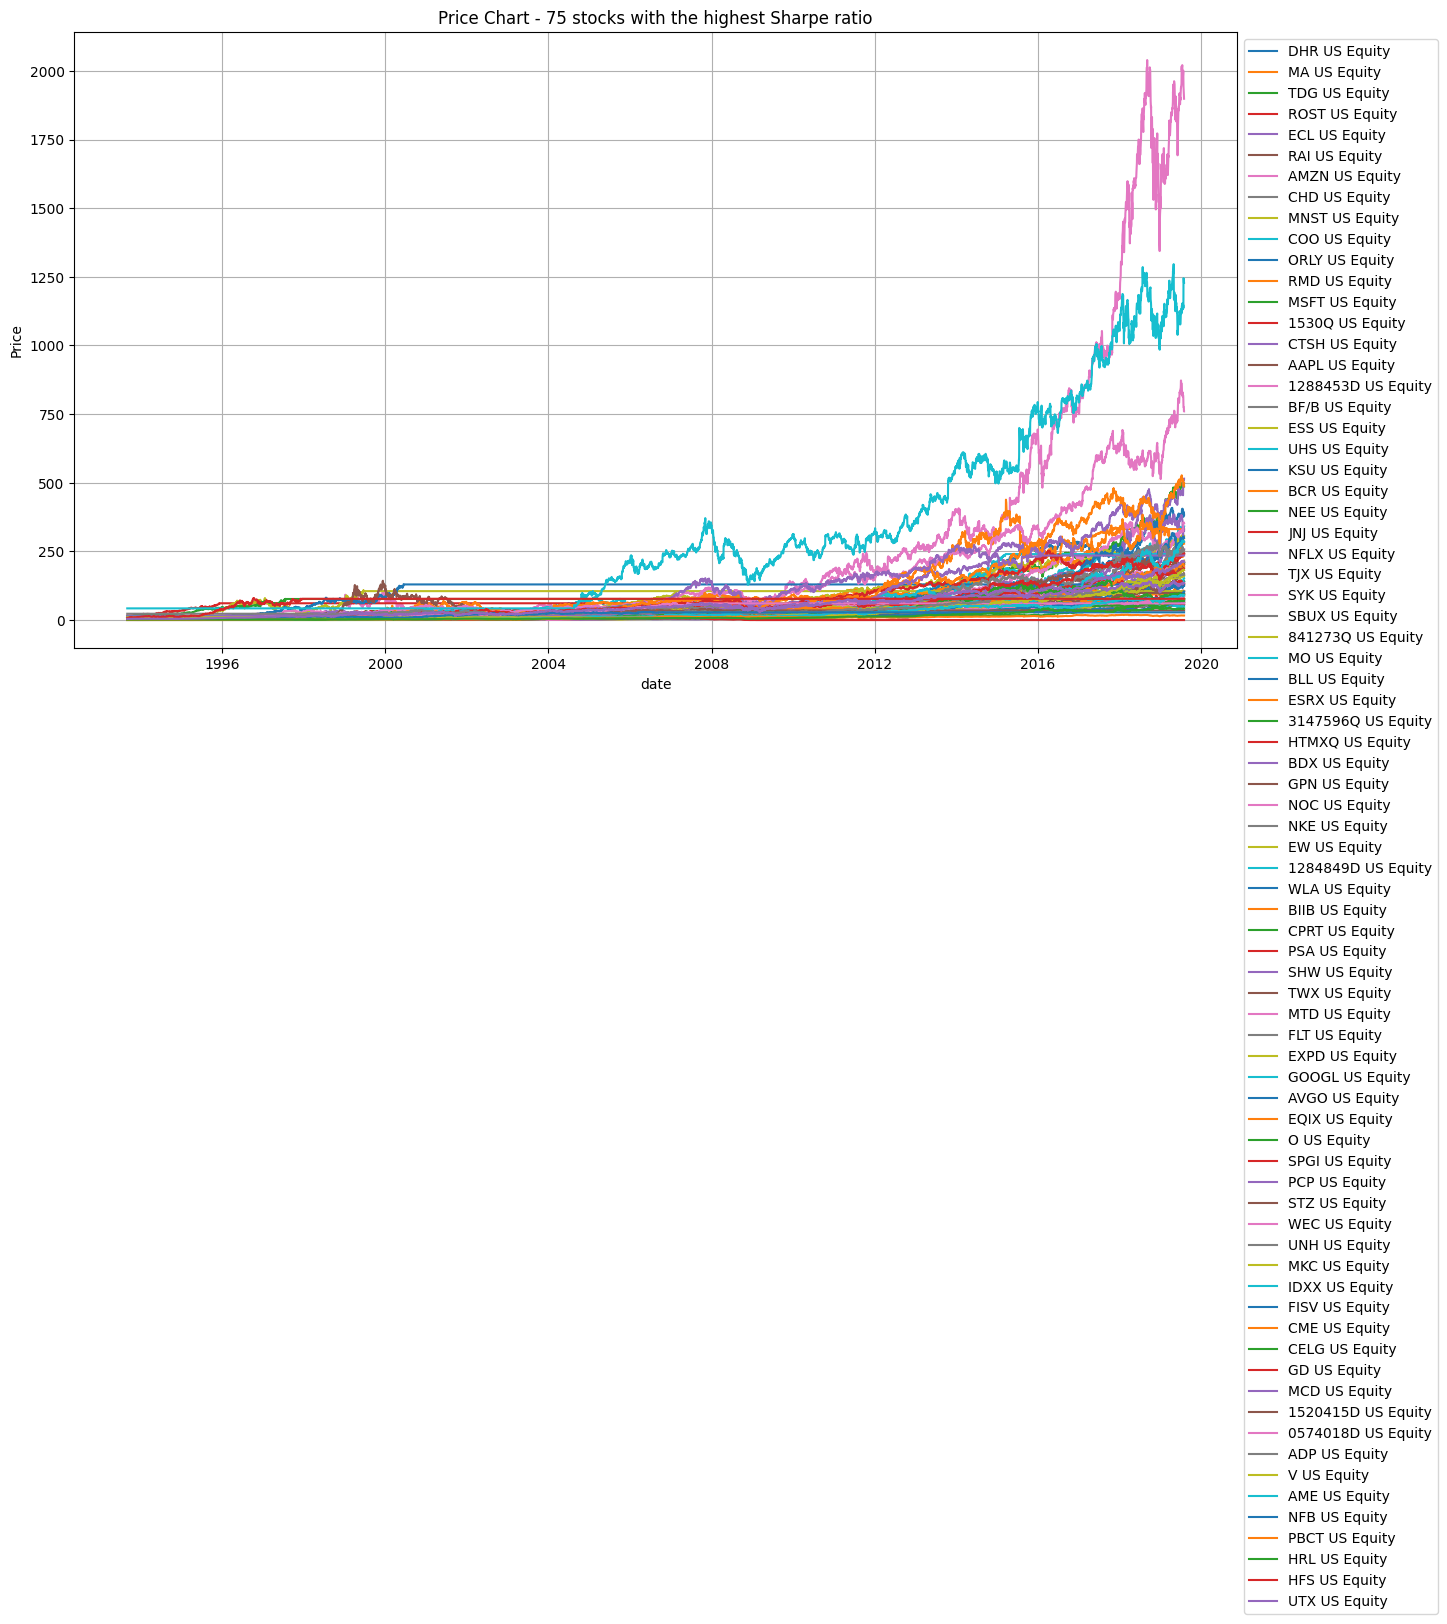

In [2]:
import matplotlib.pyplot as plt

# Price chart
plt.figure(figsize=(15, 8))
for column in top_75_data.columns:
    plt.plot(top_75_data[column], label=column)

plt.title('Price Chart - 75 stocks with the highest Sharpe ratio')
plt.xlabel('date')
plt.ylabel('Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

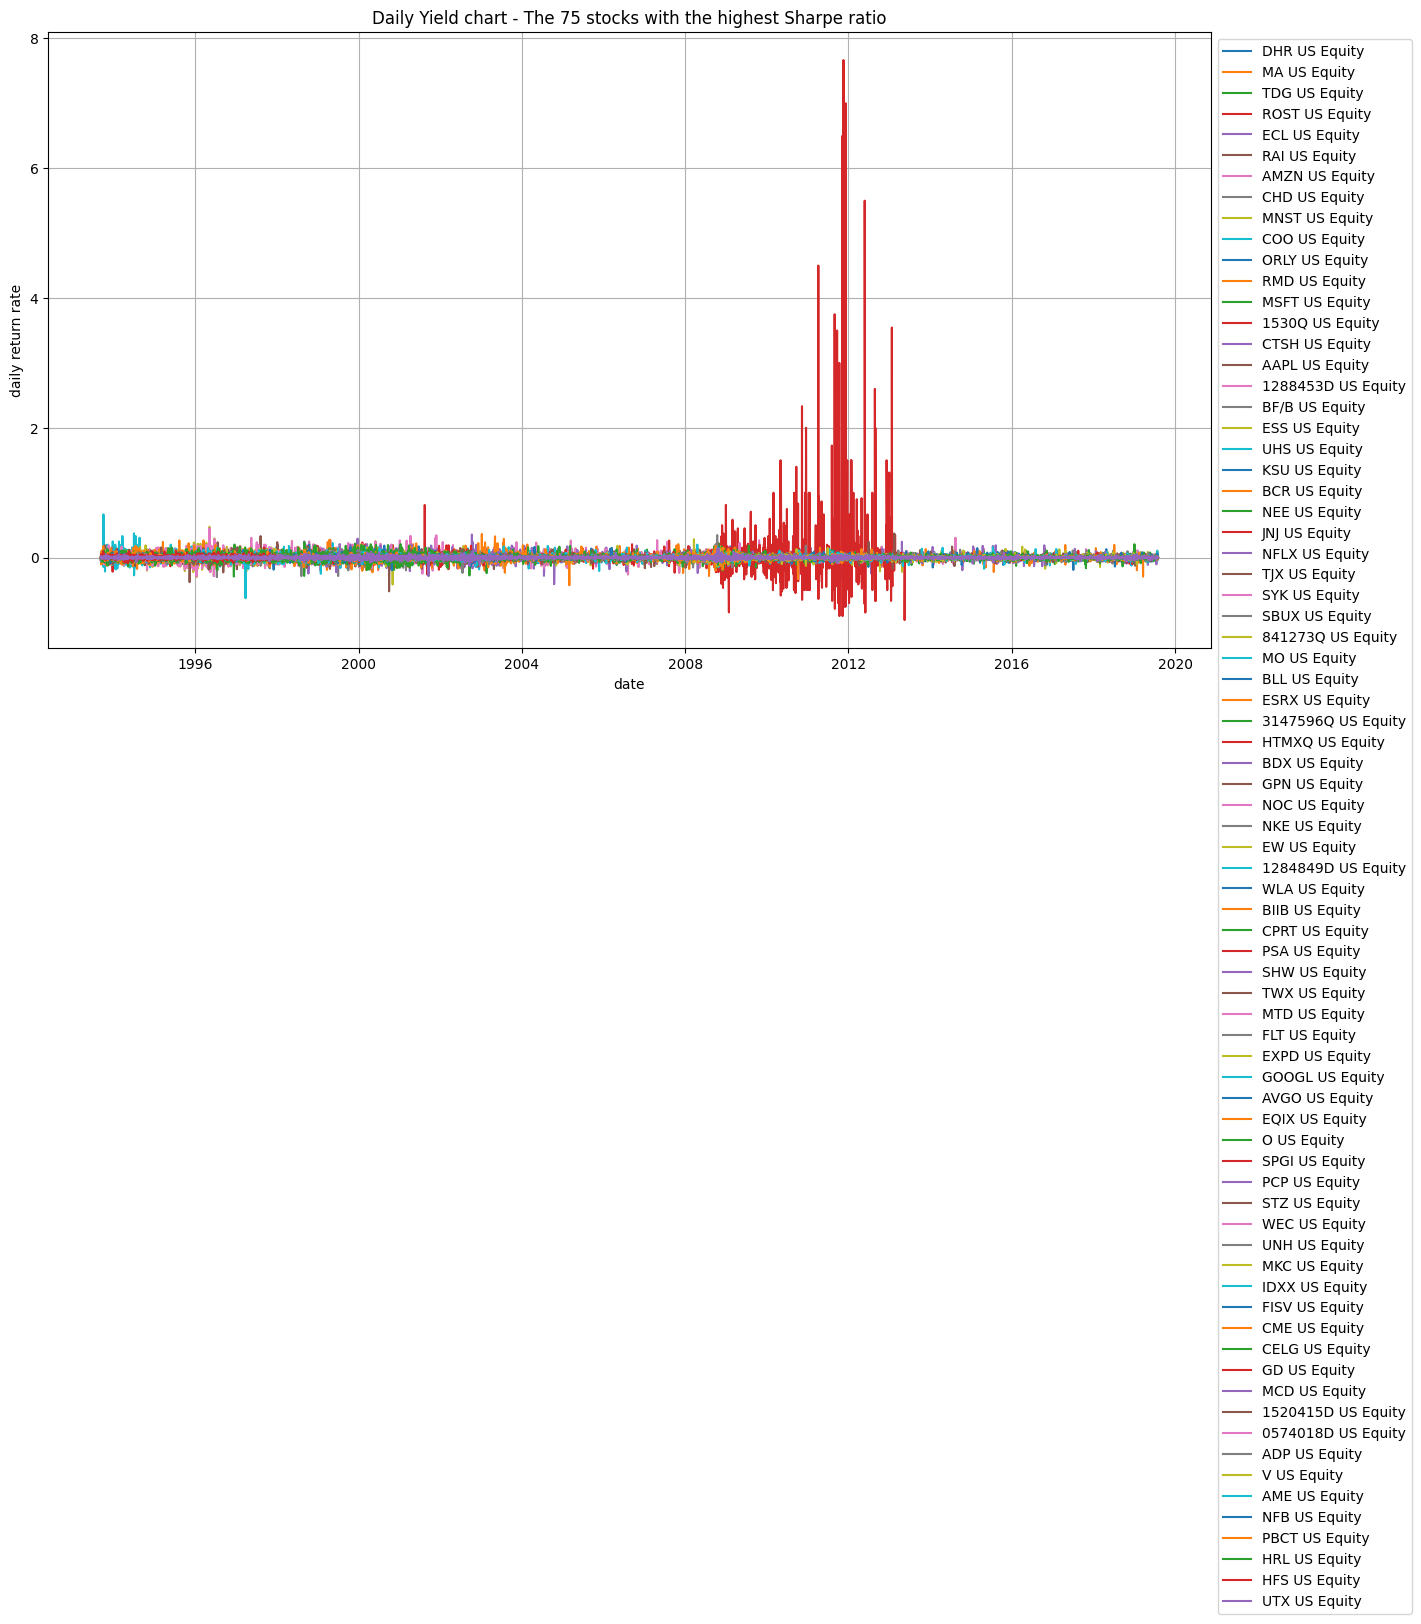

In [3]:
daily_returns_top_75 = top_75_data.pct_change().dropna()

# Plot the daily yield
plt.figure(figsize=(15, 8))
for column in daily_returns_top_75.columns:
    plt.plot(daily_returns_top_75[column], label=column)

plt.title('Daily Yield chart - The 75 stocks with the highest Sharpe ratio')
plt.xlabel('date')
plt.ylabel('daily return rate')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

In [4]:
# Check if any NaN values exist
has_nan = top_75_data.isnull().values.any()
print("Does top_75_data have any NaN values?", has_nan)

Does top_75_data have any NaN values? False


In [5]:
top_75_stocks = sharpe_ratios.nlargest(75)

top_75_stocks

DHR US Equity     0.050419
MA US Equity      0.049807
TDG US Equity     0.049146
ROST US Equity    0.049030
ECL US Equity     0.048236
                    ...   
NFB US Equity     0.040010
PBCT US Equity    0.039987
HRL US Equity     0.039962
HFS US Equity     0.039912
UTX US Equity     0.039891
Length: 75, dtype: float64

# Generates static absolute weights 生成静态绝对权重

## Using random combinations, the portfolio is calculated at 6-month intervals

# Random Generation 1000 (historical data)

Formulate an investment strategy for the current year using data up to the end of the previous year.

投资组合的选择只基于过去的数据：使用截至上一年末的数据来形成对当前年份的投资策略

Portfolio selection is based only on past data: data up to the end of the previous year is used to form an investment strategy for the current year

In [6]:
import numpy as np
import pandas as pd

# 分组数据，但不包括当前年份数据
# Group data, but not the current year
results_per_year = {}
start_year = top_75_data.index.year.min() + 1  # 数据的第二年开始处理  Data processing begins in the second year

for year in range(start_year, top_75_data.index.year.max() + 1):
    # 使用前一年的数据来形成投资组合 Use the previous year's data to form a portfolio
    past_data = top_75_data[top_75_data.index.year < year]
    current_year_data = top_75_data[top_75_data.index.year == year]
    
    # 去除缺失值 Remove missing value
    past_data = past_data.dropna()
    current_year_data = current_year_data.dropna()

    # 计算前一年中每支股票的平均价格 Calculate the average price of each stock during the previous year
    avg_price_last_year = past_data.groupby(past_data.index.year).mean().iloc[-1]

    # 获取上一年的最后一天的价格 Get the price on the last day of that year
    last_day_price_current_year = past_data.iloc[-1]

    # 选择最后一天价格大于前一年平均价格的股票 Select stocks whose last day price is greater than the average price of the previous year
    selected_stocks = last_day_price_current_year[last_day_price_current_year > avg_price_last_year].index

    # 过滤掉没有被选择的股票数据 Filter out stock data that is not selected
    selected_past_data = past_data[selected_stocks]
    selected_current_year_data = current_year_data[selected_stocks]

    # 计算每日收益率 Calculated daily rate of return
    daily_returns = selected_past_data.pct_change().dropna()

    num_assets = len(daily_returns.columns)
    num_portfolios = 1000

    all_weights = np.zeros((num_portfolios, num_assets))
    ret_arr = np.zeros(num_portfolios)
    vol_arr = np.zeros(num_portfolios)
    sharpe_arr = np.zeros(num_portfolios)

    for i in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        all_weights[i, :] = weights

        # Under best portfolio, compute its historical annualized return （base on historical data）
        expected_return = np.sum(daily_returns.mean() * weights) * 252
        ret_arr[i] = expected_return

        # Under best portfolio, compute its historical annualized volatility (using historical data)
        expected_volatility = np.sqrt(np.dot(weights.T, np.dot(daily_returns.cov() * 252, weights)))
        vol_arr[i] = expected_volatility

        # Under best portfolio, compute its historical SR
        sharpe_arr[i] = expected_return / expected_volatility

    # Select the portfolio with the highest historical sharpe ratio
    max_index = sharpe_arr.argmax()
    optimal_weights = all_weights[max_index]
    max_sharpe_ratio = sharpe_arr[max_index]

    # 使用当前年的数据来计算实际的夏普比率 Use the current year's data to calculate the actual Sharpe ratio
    current_year_returns = selected_current_year_data.pct_change().dropna()
    actual_return = np.sum(current_year_returns.mean() * optimal_weights) * 252
    actual_volatility = np.sqrt(np.dot(optimal_weights.T, np.dot(current_year_returns.cov() * 252, optimal_weights)))
    actual_sharpe_ratio = actual_return / actual_volatility

    # 保存每年的结果
    results_per_year[year] = {
        'weights': optimal_weights,
        'predicted_sharpe_ratio': max_sharpe_ratio,
        'actual_sharpe_ratio': actual_sharpe_ratio,
        'predicted_return': ret_arr[max_index],
        'predicted_volatility': vol_arr[max_index],
        'actual_return': actual_return,
        'actual_volatility': actual_volatility
    }

# 打印每年的结果
for year, results in results_per_year.items():
    print(f"Year: {year}")
    print("Weights:", results['weights'])
    print("Predicted Annual Return:", results['predicted_return'])
    print("Predicted Annual Volatility:", results['predicted_volatility'])
    print("Predicted Sharpe Ratio:", results['predicted_sharpe_ratio'])
    print("Actual Annual Return:", results['actual_return'])
    print("Actual Annual Volatility:", results['actual_volatility'])
    print("Actual Sharpe Ratio:", results['actual_sharpe_ratio'])
    print("\n")


Year: 1994
Weights: [0.03716264 0.03488429 0.03891945 0.00134013 0.04186882 0.02103104
 0.035369   0.03017426 0.0286433  0.02139133 0.0528064  0.00929488
 0.04455971 0.02727546 0.01535584 0.00822223 0.03974113 0.03630926
 0.03792305 0.02636373 0.02907749 0.00245558 0.04458742 0.00030664
 0.01892841 0.04151248 0.00261557 0.02423551 0.03872931 0.00361313
 0.00182146 0.03720449 0.0079681  0.01200664 0.0095115  0.01647646
 0.01351934 0.02851818 0.05208366 0.02619267]
Predicted Annual Return: 0.5224235128166701
Predicted Annual Volatility: 0.07749317780550564
Predicted Sharpe Ratio: 6.741541999062962
Actual Annual Return: 0.13200429185926704
Actual Annual Volatility: 0.10376198695813647
Actual Sharpe Ratio: 1.2721835397439443


Year: 1995
Weights: [0.04266419 0.04643612 0.0063176  0.04158534 0.03488518 0.00096577
 0.00094845 0.02492759 0.03140291 0.03292986 0.0013437  0.04486432
 0.02358333 0.00979613 0.02750227 0.03677545 0.04872297 0.02925301
 0.01689377 0.04937855 0.01422146 0.00913011 0

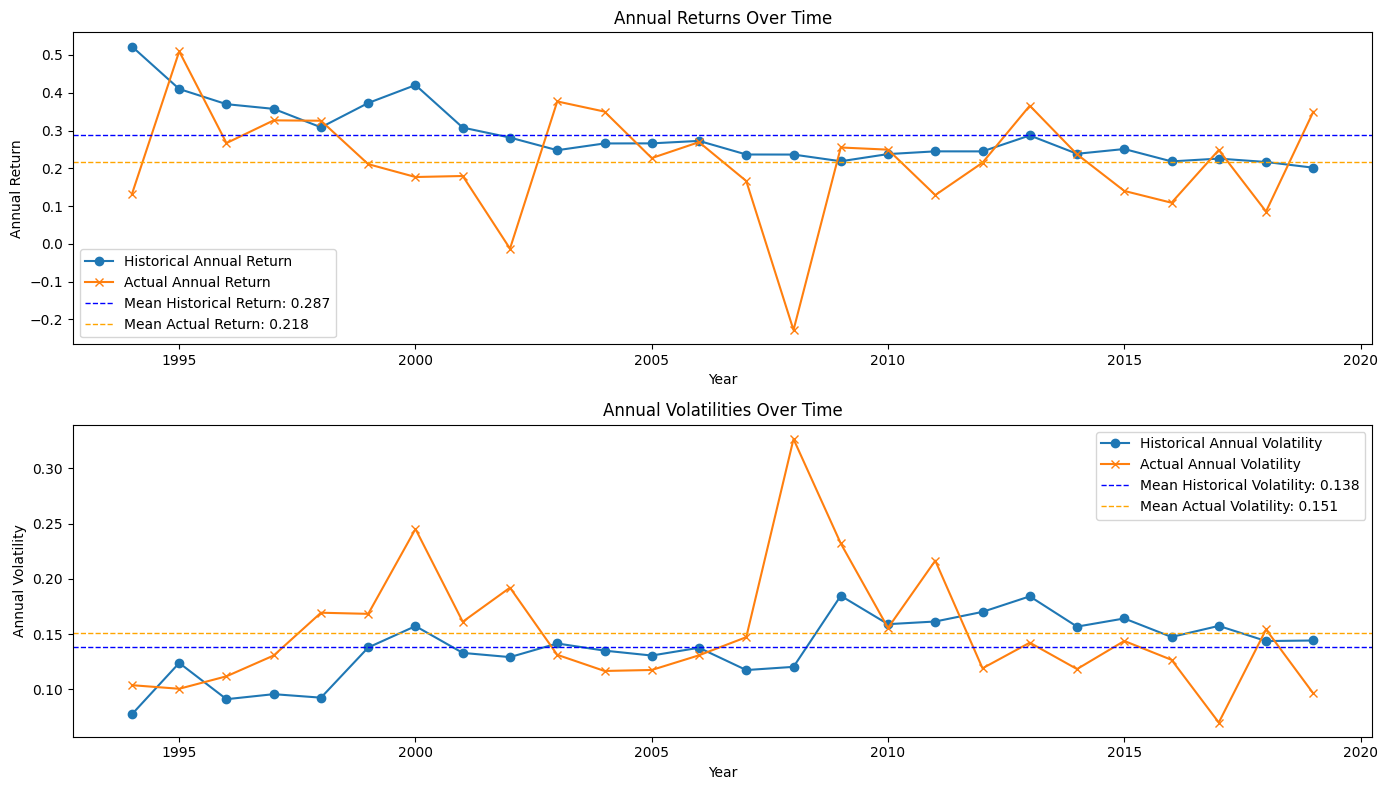

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# extract data
years = list(results_per_year.keys())
predicted_returns = [results_per_year[year]['predicted_return'] for year in years]
predicted_volatilities = [results_per_year[year]['predicted_volatility'] for year in years]
actual_returns = [results_per_year[year]['actual_return'] for year in years]
actual_volatilities = [results_per_year[year]['actual_volatility'] for year in years]

mean_predicted_return = np.mean(predicted_returns)
mean_actual_return = np.mean(actual_returns)
mean_predicted_volatility = np.mean(predicted_volatilities)
mean_actual_volatility = np.mean(actual_volatilities)


plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(years, predicted_returns, label='Historical Annual Return', marker='o')
plt.plot(years, actual_returns, label='Actual Annual Return', marker='x')
plt.axhline(y=mean_predicted_return, color='blue', linestyle='--', linewidth=1, label=f'Mean Historical Return: {mean_predicted_return:.3f}')
plt.axhline(y=mean_actual_return, color='orange', linestyle='--', linewidth=1, label=f'Mean Actual Return: {mean_actual_return:.3f}')
plt.title('Annual Returns Over Time')
plt.xlabel('Year')
plt.ylabel('Annual Return')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(years, predicted_volatilities, label='Historical Annual Volatility', marker='o')
plt.plot(years, actual_volatilities, label='Actual Annual Volatility', marker='x')
plt.axhline(y=mean_predicted_volatility, color='blue', linestyle='--', linewidth=1, label=f'Mean Historical Volatility: {mean_predicted_volatility:.3f}')
plt.axhline(y=mean_actual_volatility, color='orange', linestyle='--', linewidth=1, label=f'Mean Actual Volatility: {mean_actual_volatility:.3f}')
plt.title('Annual Volatilities Over Time')
plt.xlabel('Year')
plt.ylabel('Annual Volatility')
plt.legend()

plt.tight_layout()
plt.show()

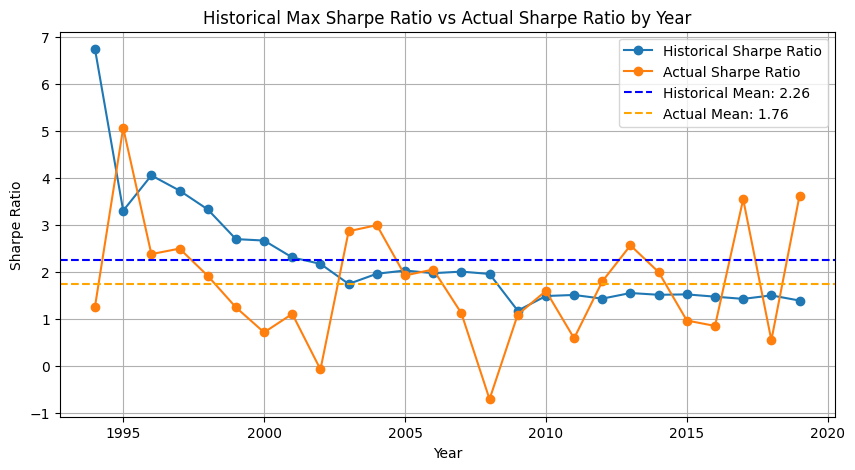

In [8]:
import matplotlib.pyplot as plt
import pandas as pd


PredictedvsActual = pd.DataFrame(results_per_year).T

# Calculate the mean and median
predicted_mean = PredictedvsActual['predicted_sharpe_ratio'].mean()
predicted_median = PredictedvsActual['predicted_sharpe_ratio'].median()
actual_mean = PredictedvsActual['actual_sharpe_ratio'].mean()
actual_median = PredictedvsActual['actual_sharpe_ratio'].median()


plt.figure(figsize=(10, 5))
plt.plot(PredictedvsActual.index, PredictedvsActual['predicted_sharpe_ratio'], label='Historical Sharpe Ratio', marker='o')
plt.plot(PredictedvsActual.index, PredictedvsActual['actual_sharpe_ratio'], label='Actual Sharpe Ratio', marker='o')

# Add mean and median lines
plt.axhline(predicted_mean, color='blue', linestyle='--', label=f'Historical Mean: {predicted_mean:.2f}')
# plt.axhline(predicted_median, color='blue', linestyle=':', label=f'Historical Median: {predicted_median:.2f}')
plt.axhline(actual_mean, color='orange', linestyle='--', label=f'Actual Mean: {actual_mean:.2f}')
# plt.axhline(actual_median, color='orange', linestyle=':', label=f'Actual Median: {actual_median:.2f}')


plt.title('Historical Max Sharpe Ratio vs Actual Sharpe Ratio by Year')
plt.xlabel('Year')
plt.ylabel('Sharpe Ratio')
plt.legend()


plt.grid(True)
plt.show()


using random generation: 6 months interval (historical data) (num_portfolios = 1000)

使用随机组合，以6个月为时间间隔计算投资组合（历史数据）

Calculate portfolios at 6-month intervals using random combinations (historical data)

In [9]:
import numpy as np
import pandas as pd


# 按每6个月分组数据并为每个时间段之前的数据生成投资组合
# Group data every 6 months and generate a portfolio for data prior to each time period
results_per_half_year = {}
initial_date = top_75_data.index.min()

for period, data in top_75_data.resample('6M'):
    if period > initial_date:  # It starts after the first six month cycle
        # Use all data from before the start of the current cycle
        past_data = top_75_data[top_75_data.index < period].dropna()
        daily_returns = past_data.pct_change().dropna()

        if not daily_returns.empty:  # Ensure that the data is not empty
            # 计算前6个月中每支股票的平均价格（假设六个月约为126个交易日）
            # Calculate the average price of each stock in the preceding 6 months (assuming that the 6 months are approximately 126 trading days)
            avg_price_last_6_months = past_data.rolling(window=126).mean().iloc[-1]

            # 获取去年的最后一天的价格 Get last day price of last year
            last_day_price_current_period = past_data.iloc[-1]

            # 选择最后一天价格大于前6个月平均价格的股票  Select stocks whose last day price is higher than the average price of the previous 6 months
            selected_stocks = last_day_price_current_period[last_day_price_current_period > avg_price_last_6_months].index

            # 过滤掉没有被选择的股票数据 Filter out stock data that is not selected
            selected_past_data = past_data[selected_stocks]
            selected_current_data = data[selected_stocks]

            # 计算每日收益率（在历史数据内）Calculate daily yield (in historical data)
            daily_returns = selected_past_data.pct_change().dropna()

            num_assets = len(daily_returns.columns)
            num_portfolios = 1000

            all_weights = np.zeros((num_portfolios, num_assets))
            ret_arr = np.zeros(num_portfolios)
            vol_arr = np.zeros(num_portfolios)
            sharpe_arr = np.zeros(num_portfolios)

            for i in range(num_portfolios):
                weights = np.random.random(num_assets)
                weights /= np.sum(weights)
                all_weights[i, :] = weights

                expected_return = np.sum(daily_returns.mean() * weights) * 252
                ret_arr[i] = expected_return

                expected_volatility = np.sqrt(np.dot(weights.T, np.dot(daily_returns.cov() * 252, weights)))
                vol_arr[i] = expected_volatility

                sharpe_arr[i] = expected_return / expected_volatility

            max_index = sharpe_arr.argmax()
            optimal_weights = all_weights[max_index]
            max_sharpe_ratio = sharpe_arr[max_index]

            # Calculate actual Sharpe ratio for the period using the optimal weights
            current_returns = selected_current_data.pct_change().dropna()
            actual_return = np.sum(current_returns.mean() * optimal_weights) * 252
            actual_volatility = np.sqrt(np.dot(optimal_weights.T, np.dot(current_returns.cov() * 252, optimal_weights)))
            actual_sharpe_ratio = actual_return / actual_volatility

            # Save results
            results_per_half_year[period] = {
                'weights': optimal_weights,
                'predicted_sharpe_ratio': max_sharpe_ratio,
                'actual_sharpe_ratio': actual_sharpe_ratio,
                'predicted_return': ret_arr[max_index],
                'predicted_volatility': vol_arr[max_index],
                'actual_return': actual_return,
                'actual_volatility': actual_volatility
            }


for period, results in results_per_half_year.items():
    print(f"Period: {period}")
    print("Weights:", results['weights'])
    print("Predicted Return:", results['predicted_return'])
    print("Predicted Volatility:", results['predicted_volatility'])
    print("Predicted Sharpe Ratio:", results['predicted_sharpe_ratio'])
    print("Actual Return:", results['actual_return'])
    print("Actual Volatility:", results['actual_volatility'])
    print("Actual Sharpe Ratio:", results['actual_sharpe_ratio'])
    print("\n")


C:\Users\liang\AppData\Local\Temp\ipykernel_16880\1596998373.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  for period, data in top_75_data.resample('6M'):
C:\Users\liang\AppData\Local\Temp\ipykernel_16880\1596998373.py:53: RuntimeWarning: invalid value encountered in scalar divide
  sharpe_arr[i] = expected_return / expected_volatility
C:\Users\liang\AppData\Local\Temp\ipykernel_16880\1596998373.py:63: RuntimeWarning: invalid value encountered in scalar divide
  actual_sharpe_ratio = actual_return / actual_volatility


Period: 1993-09-30 00:00:00
Weights: []
Predicted Return: 0.0
Predicted Volatility: 0.0
Predicted Sharpe Ratio: nan
Actual Return: 0.0
Actual Volatility: 0.0
Actual Sharpe Ratio: nan


Period: 1994-03-31 00:00:00
Weights: [0.07838498 0.02010163 0.01925788 0.03435426 0.00166646 0.05442206
 0.04984119 0.00032523 0.02823972 0.07553971 0.03486378 0.0082496
 0.06793083 0.0639302  0.07641485 0.00200731 0.00555449 0.05669107
 0.03236753 0.00407693 0.04791368 0.03137342 0.06652347 0.02599246
 0.00069587 0.06450425 0.04877713]
Predicted Return: 0.5528134134783494
Predicted Volatility: 0.12918833194431667
Predicted Sharpe Ratio: 4.279128038564857
Actual Return: 0.4602299084761651
Actual Volatility: 0.12710409339873296
Actual Sharpe Ratio: 3.6208897461106697


Period: 1994-09-30 00:00:00
Weights: [0.05393907 0.01823298 0.03156376 0.01282776 0.03071006 0.00498346
 0.04628036 0.00727602 0.03954002 0.00291707 0.00326008 0.03977911
 0.02165776 0.01905783 0.03006731 0.0072994  0.02920391 0.04835797
 0

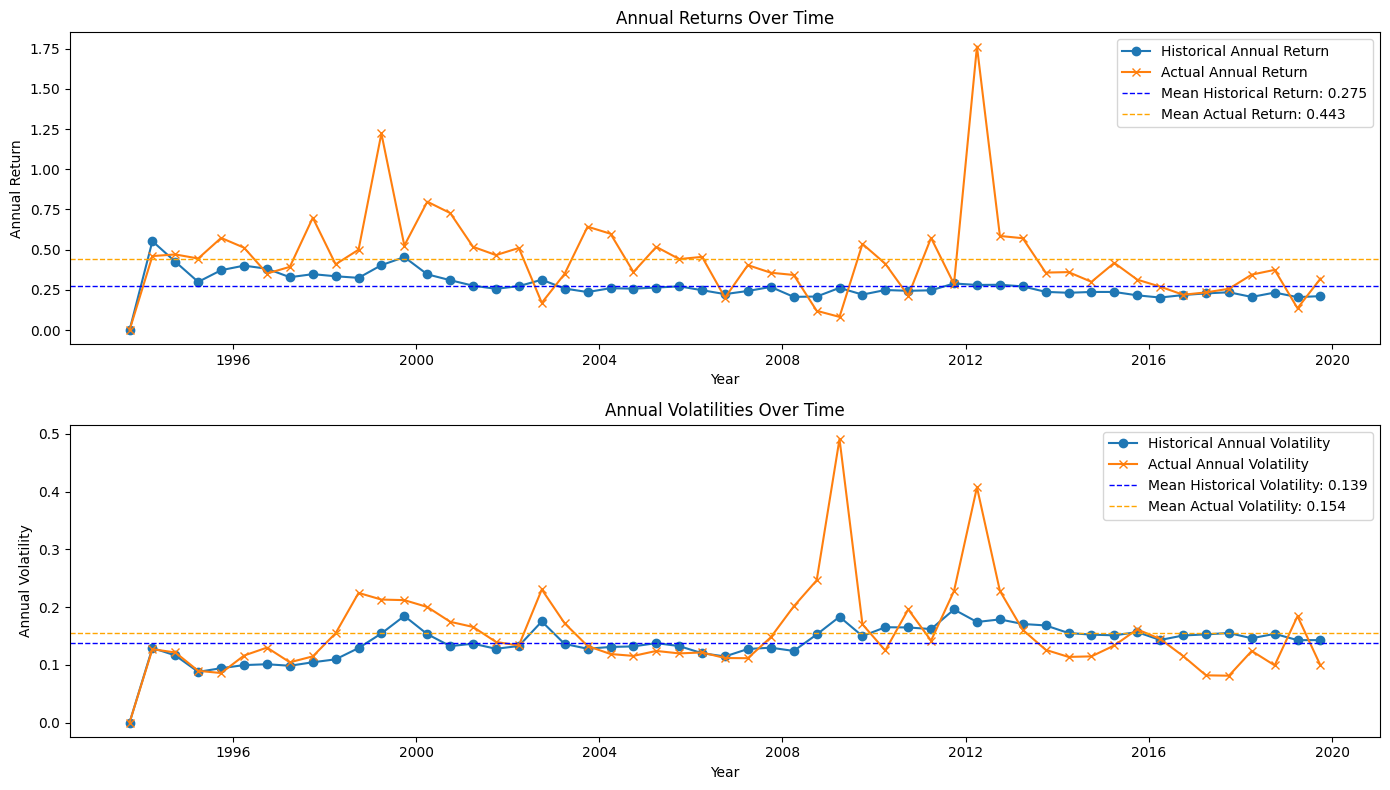

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# extract data
years = list(results_per_half_year.keys())
predicted_returns = [results_per_half_year[year]['predicted_return'] for year in years]
predicted_volatilities = [results_per_half_year[year]['predicted_volatility'] for year in years]
actual_returns = [results_per_half_year[year]['actual_return'] for year in years]
actual_volatilities = [results_per_half_year[year]['actual_volatility'] for year in years]

# 检查 actual_volatilities 是否包含 nan 值
# Check whether actual_volatilities contain nan values
if np.isnan(actual_volatilities).any():
    print("actual_volatilities contains nan values.")
    # remove nan 
    clean_actual_volatilities = [v for v in actual_volatilities if not np.isnan(v)]
    # or use mean value replacing nan
    mean_value = np.nanmean(actual_volatilities)
    clean_actual_volatilities = [v if not np.isnan(v) else mean_value for v in actual_volatilities]
else:
    clean_actual_volatilities = actual_volatilities


mean_predicted_return = np.mean(predicted_returns)
mean_actual_return = np.mean(actual_returns)
mean_predicted_volatility = np.mean(predicted_volatilities)
mean_actual_volatility = np.mean(clean_actual_volatilities)

plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(years, predicted_returns, label='Historical Annual Return', marker='o')
plt.plot(years, actual_returns, label='Actual Annual Return', marker='x')
plt.axhline(y=mean_predicted_return, color='blue', linestyle='--', linewidth=1, label=f'Mean Historical Return: {mean_predicted_return:.3f}')
plt.axhline(y=mean_actual_return, color='orange', linestyle='--', linewidth=1, label=f'Mean Actual Return: {mean_actual_return:.3f}')
plt.title('Annual Returns Over Time')
plt.xlabel('Year')
plt.ylabel('Annual Return')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(years, predicted_volatilities, label='Historical Annual Volatility', marker='o')
plt.plot(years, actual_volatilities, label='Actual Annual Volatility', marker='x')
plt.axhline(y=mean_predicted_volatility, color='blue', linestyle='--', linewidth=1, label=f'Mean Historical Volatility: {mean_predicted_volatility:.3f}')
plt.axhline(y=mean_actual_volatility, color='orange', linestyle='--', linewidth=1, label=f'Mean Actual Volatility: {mean_actual_volatility:.3f}')
plt.title('Annual Volatilities Over Time')
plt.xlabel('Year')
plt.ylabel('Annual Volatility')
plt.legend()

plt.tight_layout()
plt.show()


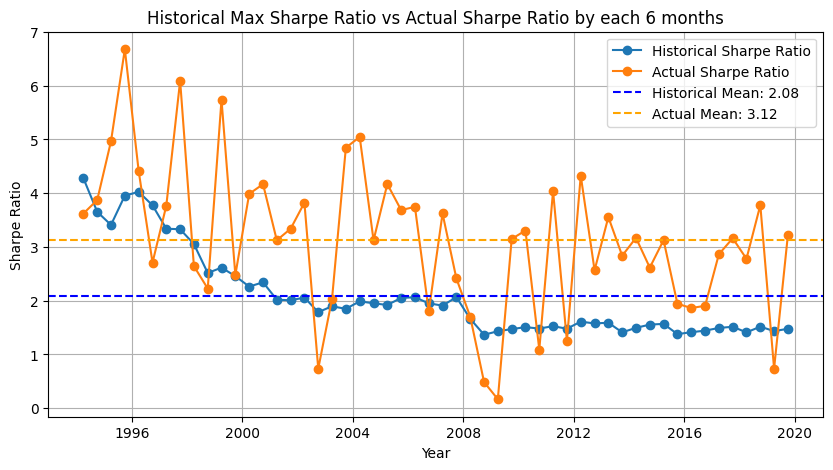

In [11]:
import matplotlib.pyplot as plt
import pandas as pd


PredictedvsActual = pd.DataFrame(results_per_half_year).T

# Calculate the mean and median
predicted_mean = PredictedvsActual['predicted_sharpe_ratio'].mean()
predicted_median = PredictedvsActual['predicted_sharpe_ratio'].median()
actual_mean = PredictedvsActual['actual_sharpe_ratio'].mean()
actual_median = PredictedvsActual['actual_sharpe_ratio'].median()


plt.figure(figsize=(10, 5))
plt.plot(PredictedvsActual.index, PredictedvsActual['predicted_sharpe_ratio'], label='Historical Sharpe Ratio', marker='o')
plt.plot(PredictedvsActual.index, PredictedvsActual['actual_sharpe_ratio'], label='Actual Sharpe Ratio', marker='o')

# Add mean and median lines
plt.axhline(predicted_mean, color='blue', linestyle='--', label=f'Historical Mean: {predicted_mean:.2f}')
# plt.axhline(predicted_median, color='blue', linestyle=':', label=f'Historical Median: {predicted_median:.2f}')
plt.axhline(actual_mean, color='orange', linestyle='--', label=f'Actual Mean: {actual_mean:.2f}')
# plt.axhline(actual_median, color='orange', linestyle=':', label=f'Actual Median: {actual_median:.2f}')


plt.title('Historical Max Sharpe Ratio vs Actual Sharpe Ratio by each 6 months')
plt.xlabel('Year')
plt.ylabel('Sharpe Ratio')
plt.legend()


plt.grid(True)
plt.show()

# Static absolute weights - Standard Optimisation

## Standard Optimization (historical data) - each year

按年分隔使用standard optimization找最佳投资组合，只使用历史数据

Use standard optimization to find the best portfolio by year, using only historical data

In [12]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# 定义重新计算夏普比率的函数，用于优化 Define a function for recalculating the Sharpe ratio for optimization
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0):
    portfolio_return = np.dot(weights, mean_returns) * 252
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return -sharpe_ratio

# 定义优化投资组合的函数 Define a function that optimizes the portfolio
def optimize_portfolio(returns):
    mean_returns = returns.mean()
    cov_matrix = returns.cov()
    num_assets = len(mean_returns)

    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # 权重总和为1 The weight sum is 1
    bounds = tuple((0.0, 1.0) for asset in range(num_assets))  # 每个资产的权重在0到1之间 Each asset's weight is between 0 and 1
    initial_guess = np.array(num_assets * [1. / num_assets])  # 初始猜测为均等分配 The initial guess is equal distribution

    result = minimize(neg_sharpe_ratio, initial_guess, args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result

# 按年份分组处理数据 Processing data is grouped by year
results_per_year = {}
start_year = top_75_data.index.year.min() + 1  # 数据的第二年开始处理 Processing begins in the second year of data

for year in range(start_year, top_75_data.index.year.max() + 1):
    # 使用前一年的数据进行优化 Optimize using data from the previous year
    past_data = top_75_data[top_75_data.index.year < year].dropna()

    # 计算前一年的平均价格 Calculate the average price for the previous year
    avg_price_last_year = past_data.groupby(past_data.index.year).mean().iloc[-1]

    # 获取当前年的最后一天的价格 Get the last day's price for the past year
    current_year_data = top_75_data[top_75_data.index.year == year].dropna()
    last_day_price_current_year = past_data.iloc[-1]

    # 选择最后一天价格大于前一年平均价格的股票 Select stocks where the last day's price is greater than the previous year's average price
    selected_stocks = last_day_price_current_year[last_day_price_current_year > avg_price_last_year].index

    # 过滤掉没有被选择的股票数据 Filter the data to keep only the selected stocks
    selected_past_data = past_data[selected_stocks]
    past_returns = selected_past_data.pct_change().dropna()

    if not past_returns.empty:
        optimized_result = optimize_portfolio(past_returns)
        predicted_sharpe_ratio = -optimized_result.fun

        # 计算预测的年化收益和波动率 Calculate predicted annual return and volatility
        mean_returns = past_returns.mean()
        cov_matrix = past_returns.cov()
        predicted_return = np.dot(optimized_result.x, mean_returns) * 252
        predicted_volatility = np.sqrt(np.dot(optimized_result.x.T, np.dot(cov_matrix * 252, optimized_result.x)))

        # 使用当前年的数据计算实际夏普比率 Calculate the actual Sharpe ratio using data for the current year
        current_year_returns = current_year_data[selected_stocks].pct_change().dropna()
        actual_sharpe_ratio = -neg_sharpe_ratio(optimized_result.x, current_year_returns.mean(), current_year_returns.cov())

        # 计算实际的年化收益和波动率 Calculate actual annual return and volatility
        actual_return = np.dot(optimized_result.x, current_year_returns.mean()) * 252
        actual_volatility = np.sqrt(np.dot(optimized_result.x.T, np.dot(current_year_returns.cov() * 252, optimized_result.x)))

        results_per_year[year] = {
            'predicted_sharpe_ratio': predicted_sharpe_ratio,
            'actual_sharpe_ratio': actual_sharpe_ratio,
            'weights': optimized_result.x,
            'predicted_return': predicted_return,
            'predicted_volatility': predicted_volatility,
            'actual_return': actual_return,
            'actual_volatility': actual_volatility
        }

# 输出结果 Print the results
for year, results in results_per_year.items():
    print(f"Year: {year}")
    print("Weights:", results['weights'])
    print("Predicted Sharpe Ratio:", results['predicted_sharpe_ratio'])
    print("Actual Sharpe Ratio:", results['actual_sharpe_ratio'])
    print("Predicted Annual Return:", results['predicted_return'])
    print("Predicted Annual Volatility:", results['predicted_volatility'])
    print("Actual Annual Return:", results['actual_return'])
    print("Actual Annual Volatility:", results['actual_volatility'])
    print("\n")


Year: 1994
Weights: [0.00000000e+00 1.39089069e-02 9.48230013e-02 1.16543150e-02
 6.29616199e-02 0.00000000e+00 1.36897306e-01 0.00000000e+00
 3.41528903e-02 1.81575259e-04 1.27337884e-02 0.00000000e+00
 0.00000000e+00 5.16184005e-02 0.00000000e+00 9.90666026e-02
 3.24615859e-02 1.96535934e-02 9.01364305e-14 2.07646519e-03
 1.96533269e-13 0.00000000e+00 4.17025347e-13 0.00000000e+00
 1.88233355e-02 0.00000000e+00 0.00000000e+00 1.00837853e-01
 3.58818733e-02 5.76025631e-02 0.00000000e+00 2.19970147e-02
 0.00000000e+00 0.00000000e+00 9.23413065e-14 0.00000000e+00
 4.70775259e-03 0.00000000e+00 9.24385050e-02 9.55210524e-02]
Predicted Sharpe Ratio: 9.454219374633917
Actual Sharpe Ratio: 1.3240830479593055
Predicted Annual Return: 0.7053115359975294
Predicted Annual Volatility: 0.07460283160870067
Actual Annual Return: 0.15565238628405503
Actual Annual Volatility: 0.117554851656736


Year: 1995
Weights: [1.11672135e-01 2.41078001e-02 5.20280909e-02 1.52519954e-01
 2.18578436e-03 6.8671827

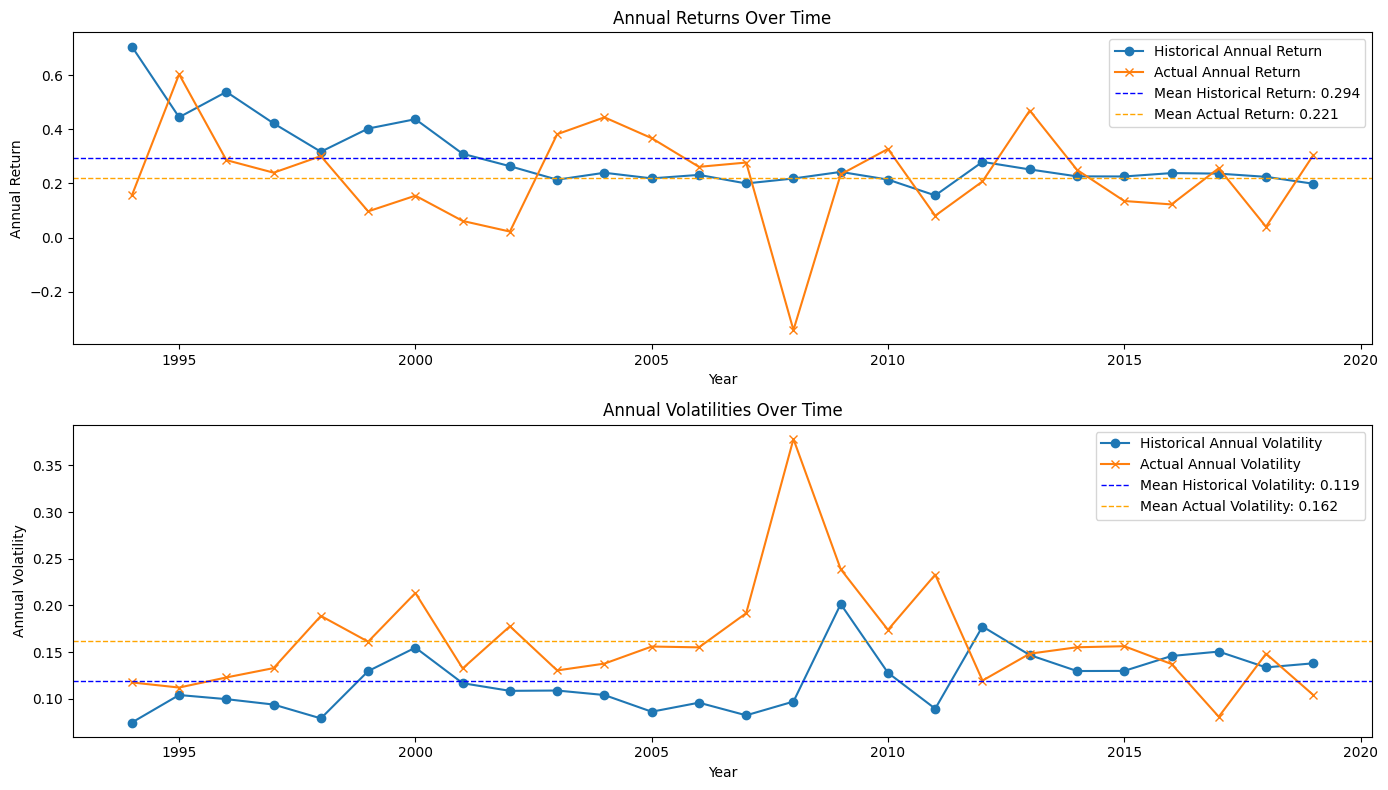

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# extract data
years = list(results_per_year.keys())
predicted_returns = [results_per_year[year]['predicted_return'] for year in years]
predicted_volatilities = [results_per_year[year]['predicted_volatility'] for year in years]
actual_returns = [results_per_year[year]['actual_return'] for year in years]
actual_volatilities = [results_per_year[year]['actual_volatility'] for year in years]

mean_predicted_return = np.mean(predicted_returns)
mean_actual_return = np.mean(actual_returns)
mean_predicted_volatility = np.mean(predicted_volatilities)
mean_actual_volatility = np.mean(actual_volatilities)


plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(years, predicted_returns, label='Historical Annual Return', marker='o')
plt.plot(years, actual_returns, label='Actual Annual Return', marker='x')
plt.axhline(y=mean_predicted_return, color='blue', linestyle='--', linewidth=1, label=f'Mean Historical Return: {mean_predicted_return:.3f}')
plt.axhline(y=mean_actual_return, color='orange', linestyle='--', linewidth=1, label=f'Mean Actual Return: {mean_actual_return:.3f}')
plt.title('Annual Returns Over Time')
plt.xlabel('Year')
plt.ylabel('Annual Return')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(years, predicted_volatilities, label='Historical Annual Volatility', marker='o')
plt.plot(years, actual_volatilities, label='Actual Annual Volatility', marker='x')
plt.axhline(y=mean_predicted_volatility, color='blue', linestyle='--', linewidth=1, label=f'Mean Historical Volatility: {mean_predicted_volatility:.3f}')
plt.axhline(y=mean_actual_volatility, color='orange', linestyle='--', linewidth=1, label=f'Mean Actual Volatility: {mean_actual_volatility:.3f}')
plt.title('Annual Volatilities Over Time')
plt.xlabel('Year')
plt.ylabel('Annual Volatility')
plt.legend()

plt.tight_layout()
plt.show()

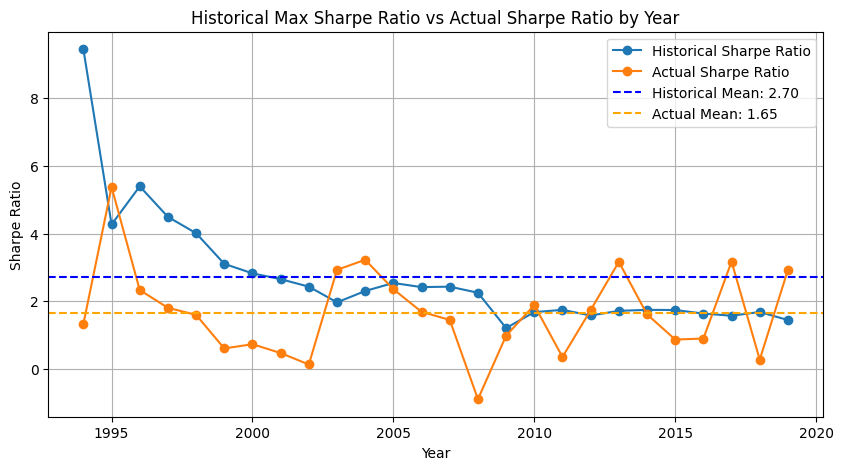

In [14]:
import matplotlib.pyplot as plt
import pandas as pd


PredictedvsActual = pd.DataFrame(results_per_year).T

# Calculate the mean and median
predicted_mean = PredictedvsActual['predicted_sharpe_ratio'].mean()
predicted_median = PredictedvsActual['predicted_sharpe_ratio'].median()
actual_mean = PredictedvsActual['actual_sharpe_ratio'].mean()
actual_median = PredictedvsActual['actual_sharpe_ratio'].median()


plt.figure(figsize=(10, 5))
plt.plot(PredictedvsActual.index, PredictedvsActual['predicted_sharpe_ratio'], label='Historical Sharpe Ratio', marker='o')
plt.plot(PredictedvsActual.index, PredictedvsActual['actual_sharpe_ratio'], label='Actual Sharpe Ratio', marker='o')

# Add mean and median lines
plt.axhline(predicted_mean, color='blue', linestyle='--', label=f'Historical Mean: {predicted_mean:.2f}')
# plt.axhline(predicted_median, color='blue', linestyle=':', label=f'Historical Median: {predicted_median:.2f}')
plt.axhline(actual_mean, color='orange', linestyle='--', label=f'Actual Mean: {actual_mean:.2f}')
# plt.axhline(actual_median, color='orange', linestyle=':', label=f'Actual Median: {actual_median:.2f}')


plt.title('Historical Max Sharpe Ratio vs Actual Sharpe Ratio by Year')
plt.xlabel('Year')
plt.ylabel('Sharpe Ratio')
plt.legend()


plt.grid(True)
plt.show()


## Standard Optimization (historical data) - each half year

In [15]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# 定义重新计算夏普比率的函数，用于优化 Define a function for recalculating the Sharpe ratio for optimization
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0):
    portfolio_return = np.dot(weights, mean_returns) * 252
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return -sharpe_ratio

# 定义优化投资组合的函数 Define a function that optimizes the portfolio
def optimize_portfolio(returns):
    mean_returns = returns.mean()
    cov_matrix = returns.cov()
    num_assets = len(mean_returns)

    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # 权重总和为1 The weight sum is 1
    bounds = tuple((0.0, 1.0) for asset in range(num_assets))  # 每个资产的权重在0到1之间 Each asset's weight is between 0 and 1
    initial_guess = np.array(num_assets * [1. / num_assets])  # 初始猜测为均等分配 The initial guess is equal distribution

    result = minimize(neg_sharpe_ratio, initial_guess, args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result

# 处理数据按半年分组 Processing data is grouped by half a year
results_per_period = {}
start_date = top_75_data.index.min() + pd.DateOffset(months=6)  # 数据处理从第七个月开始 Data processing begins at the seventh month

# 按半年分组，计算优化结果和实际结果 The optimization results and actual results were calculated by half year group
current_date = start_date
while current_date <= top_75_data.index.max():
    # 使用前六个月的数据进行优化 Optimize using data from the first six months
    past_data = top_75_data[(top_75_data.index < current_date) & 
                            (top_75_data.index >= current_date - pd.DateOffset(months=6))].dropna()
    past_returns = past_data.pct_change().dropna()

    if not past_returns.empty:
        # 计算前六个月的平均价格 Calculate the average price over the past six months
        avg_price_last_6_months = past_data.rolling(window=126).mean().iloc[-1]

        # 获取当前期间的最后一天的价格 Get the last day's price for the current period
        last_day_price_current_period = past_data.iloc[-1]

        # 选择最后一天价格大于前六个月平均价格的股票 Select stocks where the last day's price is greater than the previous six months' average price
        selected_stocks = last_day_price_current_period[last_day_price_current_period > avg_price_last_6_months].index

        # 过滤掉没有被选择的股票数据 Filter the data to keep only the selected stocks
        selected_past_data = past_data[selected_stocks]
        selected_past_returns = selected_past_data.pct_change().dropna()

        if not selected_past_returns.empty:
            optimized_result = optimize_portfolio(selected_past_returns)
            predicted_sharpe_ratio = -optimized_result.fun

            # 计算预测的年化收益和波动率 Calculate the annualized return and volatility of the forecast
            mean_returns = selected_past_returns.mean()
            cov_matrix = selected_past_returns.cov()
            predicted_return = np.dot(optimized_result.x, mean_returns) * 252
            predicted_volatility = np.sqrt(np.dot(optimized_result.x.T, np.dot(cov_matrix * 252, optimized_result.x)))

            # 使用接下来的六个月数据计算实际夏普比率 Use the following six months to calculate the actual Sharpe ratio
            future_data = top_75_data[(top_75_data.index >= current_date) & 
                                      (top_75_data.index < current_date + pd.DateOffset(months=6))][selected_stocks].dropna()
            future_returns = future_data.pct_change().dropna()
            actual_sharpe_ratio = -neg_sharpe_ratio(optimized_result.x, future_returns.mean(), future_returns.cov())

            # 计算实际的年化收益和波动率 Calculate the actual annualized return and volatility
            actual_return = np.dot(optimized_result.x, future_returns.mean()) * 252
            actual_volatility = np.sqrt(np.dot(optimized_result.x.T, np.dot(future_returns.cov() * 252, optimized_result.x)))

            results_per_period[current_date] = {
                'predicted_sharpe_ratio': predicted_sharpe_ratio,
                'actual_sharpe_ratio': actual_sharpe_ratio,
                'weights': optimized_result.x,
                'predicted_return': predicted_return,
                'predicted_volatility': predicted_volatility,
                'actual_return': actual_return,
                'actual_volatility': actual_volatility
            }
    
    # 更新当前日期到下一半年 Update the current date to the next half year
    current_date += pd.DateOffset(months=6)

# 输出结果 Print the results
for period_start, results in results_per_period.items():
    print(f"Period Starting: {period_start}")
    print("Weights:", results['weights'])
    print("Predicted Sharpe Ratio:", results['predicted_sharpe_ratio'])
    print("Actual Sharpe Ratio:", results['actual_sharpe_ratio'])
    print("Predicted Annual Return:", results['predicted_return'])
    print("Predicted Annual Volatility:", results['predicted_volatility'])
    print("Actual Annual Return:", results['actual_return'])
    print("Actual Annual Volatility:", results['actual_volatility'])
    print("\n")


Period Starting: 1994-03-07 00:00:00
Weights: [0.00000000e+00 4.54750262e-15 9.45119152e-03 1.63163607e-01
 4.44500508e-02 0.00000000e+00 5.41487399e-02 5.52274520e-14
 3.68219706e-02 4.72053110e-14 7.35380361e-02 4.23743407e-02
 5.37829827e-03 2.80758436e-14 2.33321891e-02 1.27103480e-14
 3.32794902e-14 2.35932218e-02 2.11854242e-02 1.44393669e-02
 8.65423705e-15 2.00534086e-01 2.58298251e-14 8.82909405e-02
 2.23838323e-02 2.73777433e-02 0.00000000e+00 1.13421703e-14
 0.00000000e+00 0.00000000e+00 3.36132679e-14 3.45773257e-02
 1.08543836e-01 6.41579939e-03]
Predicted Sharpe Ratio: 7.688300864025617
Actual Sharpe Ratio: 2.5090796232347126
Predicted Annual Return: 0.7234003701340265
Predicted Annual Volatility: 0.09409105899053642
Actual Annual Return: 0.3520160576790421
Actual Annual Volatility: 0.1402968859255339


Period Starting: 1994-09-07 00:00:00
Weights: [1.09174984e-01 6.89460454e-16 2.04006118e-15 1.01423021e-02
 0.00000000e+00 3.48042088e-02 1.18338370e-01 1.11755999e-01
 5.

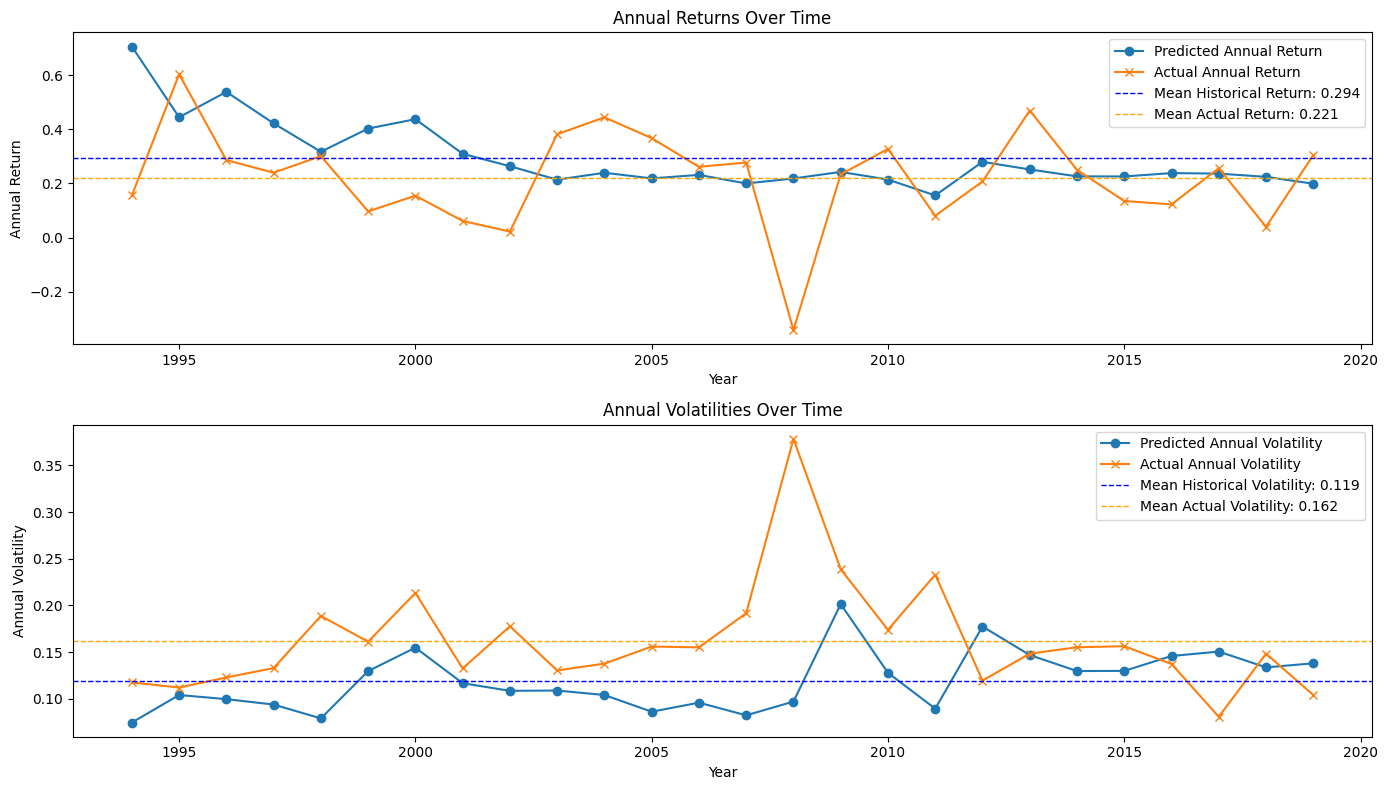

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# extract data
years = list(results_per_year.keys())
predicted_returns = [results_per_year[year]['predicted_return'] for year in years]
predicted_volatilities = [results_per_year[year]['predicted_volatility'] for year in years]
actual_returns = [results_per_year[year]['actual_return'] for year in years]
actual_volatilities = [results_per_year[year]['actual_volatility'] for year in years]

mean_predicted_return = np.mean(predicted_returns)
mean_actual_return = np.mean(actual_returns)
mean_predicted_volatility = np.mean(predicted_volatilities)
mean_actual_volatility = np.mean(actual_volatilities)


plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(years, predicted_returns, label='Predicted Annual Return', marker='o')
plt.plot(years, actual_returns, label='Actual Annual Return', marker='x')
plt.axhline(y=mean_predicted_return, color='blue', linestyle='--', linewidth=1, label=f'Mean Historical Return: {mean_predicted_return:.3f}')
plt.axhline(y=mean_actual_return, color='orange', linestyle='--', linewidth=1, label=f'Mean Actual Return: {mean_actual_return:.3f}')
plt.title('Annual Returns Over Time')
plt.xlabel('Year')
plt.ylabel('Annual Return')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(years, predicted_volatilities, label='Predicted Annual Volatility', marker='o')
plt.plot(years, actual_volatilities, label='Actual Annual Volatility', marker='x')
plt.axhline(y=mean_predicted_volatility, color='blue', linestyle='--', linewidth=1, label=f'Mean Historical Volatility: {mean_predicted_volatility:.3f}')
plt.axhline(y=mean_actual_volatility, color='orange', linestyle='--', linewidth=1, label=f'Mean Actual Volatility: {mean_actual_volatility:.3f}')
plt.title('Annual Volatilities Over Time')
plt.xlabel('Year')
plt.ylabel('Annual Volatility')
plt.legend()

plt.tight_layout()
plt.show()

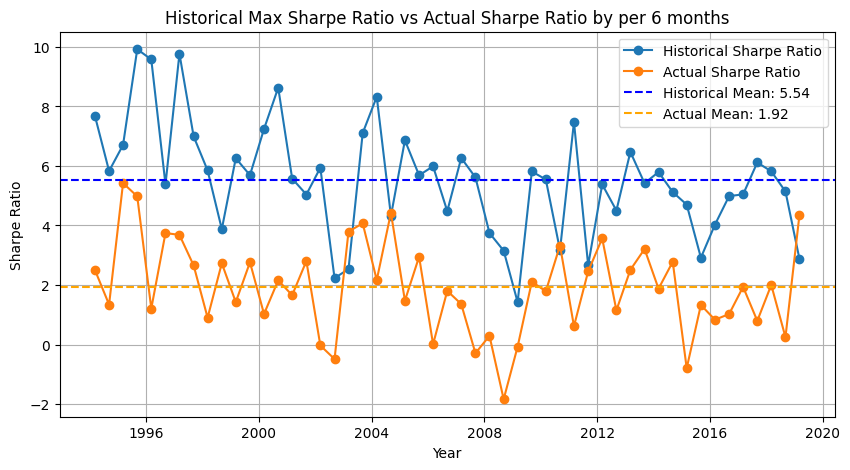

In [17]:
import matplotlib.pyplot as plt
import pandas as pd


PredictedvsActual = pd.DataFrame(results_per_period).T

# Calculate the mean and median
predicted_mean = PredictedvsActual['predicted_sharpe_ratio'].mean()
predicted_median = PredictedvsActual['predicted_sharpe_ratio'].median()
actual_mean = PredictedvsActual['actual_sharpe_ratio'].mean()
actual_median = PredictedvsActual['actual_sharpe_ratio'].median()


plt.figure(figsize=(10, 5))
plt.plot(PredictedvsActual.index, PredictedvsActual['predicted_sharpe_ratio'], label='Historical Sharpe Ratio', marker='o')
plt.plot(PredictedvsActual.index, PredictedvsActual['actual_sharpe_ratio'], label='Actual Sharpe Ratio', marker='o')

# Add mean and median lines
plt.axhline(predicted_mean, color='blue', linestyle='--', label=f'Historical Mean: {predicted_mean:.2f}')
# plt.axhline(predicted_median, color='blue', linestyle=':', label=f'Historical Median: {predicted_median:.2f}')
plt.axhline(actual_mean, color='orange', linestyle='--', label=f'Actual Mean: {actual_mean:.2f}')
# plt.axhline(actual_median, color='orange', linestyle=':', label=f'Actual Median: {actual_median:.2f}')


plt.title('Historical Max Sharpe Ratio vs Actual Sharpe Ratio by per 6 months')
plt.xlabel('Year')
plt.ylabel('Sharpe Ratio')
plt.legend()


plt.grid(True)
plt.show()

# Static ralative weights 

## Random Generation (per year)

initial_investment = 100000 (from 1998)

monthly_investment = 10000 (each month)

In [18]:
import numpy as np
import pandas as pd


# 定义重新计算夏普比率的函数，用于优化
# Define a function for recalculating the Sharpe ratio for optimization
def sharpe_ratio(weights, returns, cov_matrix, risk_free_rate=0):
    portfolio_return = np.dot(weights, returns) * 252  # 年化收益 annualized returns
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))  # 年化波动率 annualized volatility
    return (portfolio_return - risk_free_rate) / portfolio_volatility  # 夏普比率 Sharpe Ratio

# 定义随机生成权重并选择最佳组合的函数
# Define a function that randomly generates weights and selects the best combination
def random_optimize_portfolio(returns, cov_matrix, num_portfolios=10000):
    num_assets = len(returns)
    results = np.zeros((num_portfolios, 3))
    weight_array = np.zeros((num_portfolios, num_assets))
    
    for i in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        weight_array[i] = weights
        portfolio_return = np.dot(weights, returns) * 252
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))
        sharpe = (portfolio_return) / portfolio_volatility
        results[i] = [portfolio_return, portfolio_volatility, sharpe]
    
    max_sharpe_idx = np.argmax(results[:, 2])
    return weight_array[max_sharpe_idx], results[max_sharpe_idx]


results_per_year = {}
start_year = top_75_data.index.year.min() + 1  

for year in range(start_year, top_75_data.index.year.max() + 1):
    # 使用前一年的数据来形成投资组合
    past_data = top_75_data[top_75_data.index.year < year]
    current_year_data = top_75_data[top_75_data.index.year == year]
    
    # 去除缺失值
    past_data = past_data.dropna()
    current_year_data = current_year_data.dropna()

    # 计算前一年中每支股票的平均价格
    avg_price_last_year = past_data.groupby(past_data.index.year).mean().iloc[-1]

    # 获取当前年的最后一天的价格
    last_day_price_current_year = past_data.iloc[-1]

    # 选择最后一天价格大于前一年平均价格的股票
    selected_stocks = last_day_price_current_year[last_day_price_current_year > avg_price_last_year].index

    # 过滤掉没有被选择的股票数据
    selected_past_data = past_data[selected_stocks]
    selected_current_year_data = current_year_data[selected_stocks]

    # 计算每日收益率
    daily_returns = selected_past_data.pct_change().dropna()
    current_year_returns = selected_current_year_data.pct_change().dropna()

    if daily_returns.empty or current_year_returns.empty:
        continue

    # 计算前一年数据的平均收益率和协方差矩阵
    avg_returns_last_year = daily_returns.mean()
    cov_matrix_last_year = daily_returns.cov()

    # 随机生成权重并选择最佳组合
    opt_weights, opt_results = random_optimize_portfolio(avg_returns_last_year, cov_matrix_last_year)

    # 使用当前年的数据来计算实际的夏普比率
    actual_return = np.sum(current_year_returns.mean() * opt_weights) * 252
    actual_volatility = np.sqrt(np.dot(opt_weights.T, np.dot(current_year_returns.cov() * 252, opt_weights)))
    actual_sharpe_ratio = actual_return / actual_volatility

    # 保存每年的结果
    results_per_year[year] = {
        'weights': opt_weights,
        'predicted_sharpe_ratio': opt_results[2],
        'actual_sharpe_ratio': actual_sharpe_ratio,
        'predicted_return': opt_results[0],
        'predicted_volatility': opt_results[1],
        'actual_return': actual_return,
        'actual_volatility': actual_volatility
    }

    # 投资组合模拟
    initial_investment = 100000  # 初始投资 Initial investment
    monthly_investment = 10000   # 每月追加投资 Monthly additional investment
    portfolio_value = initial_investment
    total_invested = initial_investment
    monthly_returns = []

    for month in range(1, 13):
        month_str = f"{year}-{month:02d}"
        if month_str in current_year_returns.index:
            monthly_data = current_year_returns.loc[month_str]
            monthly_return = np.dot(opt_weights, monthly_data.mean())
            monthly_returns.append(monthly_return)
            portfolio_growth = monthly_return * portfolio_value
            portfolio_value += portfolio_growth + monthly_investment
            total_invested += monthly_investment

    # 计算年化平均回报和波动率 Calculate the annualized average return and volatility
    annual_return = np.mean(monthly_returns) * 12
    annual_volatility = np.std(monthly_returns) * np.sqrt(12)

    # 计算实际的夏普比率 Calculate the actual Sharpe ratio
    actual_sharpe_ratio = (annual_return - 0) / annual_volatility

    # 计算盈利 compute benefit
    profit = portfolio_value - total_invested
    profit_percentage = (profit / total_invested) * 100

    # 保存投资组合模拟结果
    results_per_year[year]['final_portfolio_value'] = portfolio_value
    results_per_year[year]['total_invested'] = total_invested
    results_per_year[year]['profit'] = profit
    results_per_year[year]['profit_percentage'] = profit_percentage

# 打印每年的结果
for year, results in results_per_year.items():
    print(f"Year: {year}")
    print("Optimal Weights:", results['weights'])
    print(f"Predicted Sharpe Ratio: {results['predicted_sharpe_ratio']:.2f}")
    print(f"Actual Sharpe Ratio: {results['actual_sharpe_ratio']:.2f}")
    print(f"Final Portfolio Value: ${results['final_portfolio_value']:.2f}")
    print(f"Total Invested: ${results['total_invested']:.2f}")
    print(f"Profit: ${results['profit']:.2f}")
    print(f"Profit Percentage: {results['profit_percentage']:.2f}%")
    print("\n")


Year: 1994
Optimal Weights: [0.02726865 0.00678197 0.03757756 0.02431996 0.04793387 0.01003303
 0.03982328 0.02087803 0.01005152 0.01271384 0.01062664 0.02343903
 0.02372196 0.04844322 0.00147531 0.04147775 0.01290991 0.04336622
 0.05181082 0.00668048 0.00151038 0.04748699 0.02631022 0.00619485
 0.02891326 0.00412322 0.00034782 0.04208467 0.03437067 0.02553961
 0.01034875 0.05275106 0.01650507 0.02543985 0.02016389 0.03916932
 0.00742235 0.01013204 0.05048214 0.04937078]
Predicted Sharpe Ratio: 7.02
Actual Sharpe Ratio: 1.84
Final Portfolio Value: $221552.74
Total Invested: $220000.00
Profit: $1552.74
Profit Percentage: 0.71%


Year: 1995
Optimal Weights: [0.02853651 0.02809533 0.02283967 0.03608713 0.01885288 0.02492813
 0.02067805 0.01145558 0.04916431 0.03985332 0.00448049 0.05558796
 0.05611947 0.04966214 0.02054441 0.03994124 0.04293826 0.01685877
 0.03857969 0.00060602 0.02460584 0.01408811 0.01743413 0.00237484
 0.02845005 0.02342894 0.03372528 0.00621094 0.00851861 0.04838933
 

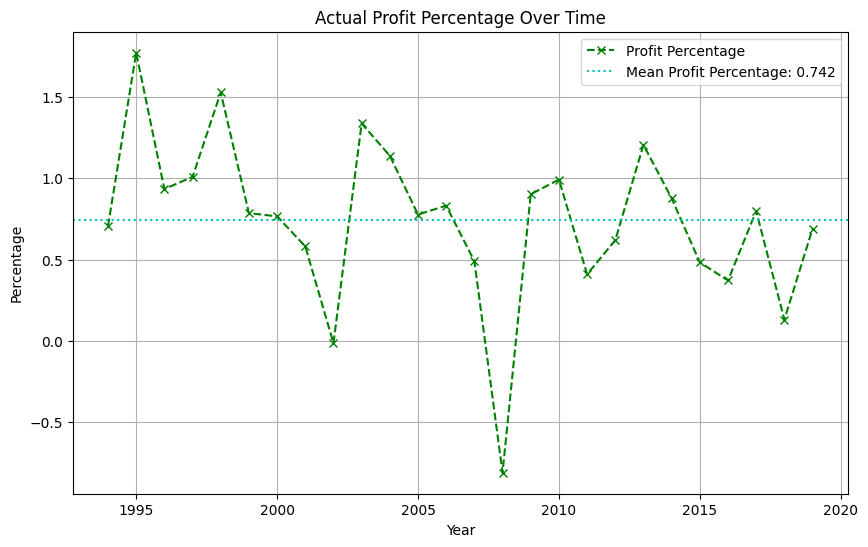

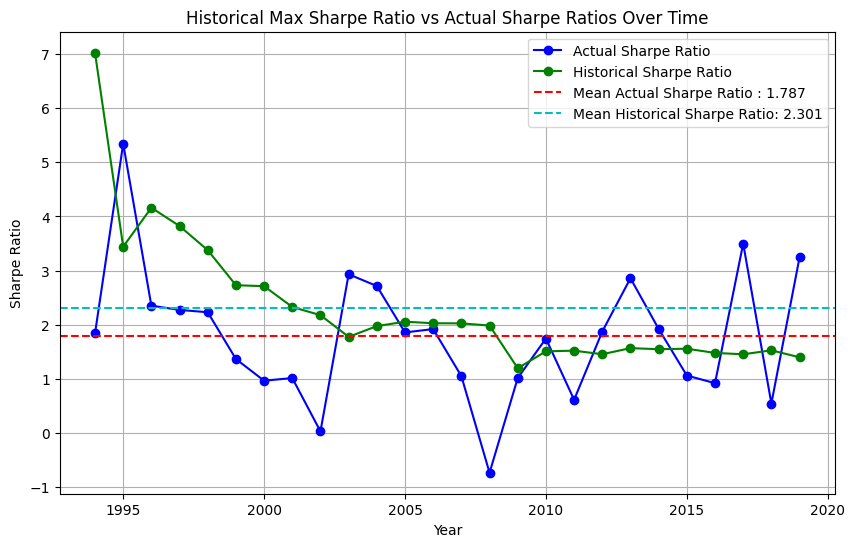

In [19]:

# 绘制实际年化回报率随时间变化的图
years = list(results_per_year.keys())
# actual_returns = [results_per_year[year]['actual_return'] for year in years]
profit_percentages = [results_per_year[year]['profit_percentage'] for year in years]

# mean_actual_return = np.mean(actual_returns)
mean_profit_percentages= np.mean(profit_percentages)

plt.figure(figsize=(10, 6))
# plt.plot(years, actual_returns, marker='o', linestyle='-', color='b', label='Actual Annual Return Rate')
plt.plot(years, profit_percentages, marker='x', linestyle='--', color='g', label='Profit Percentage')
# plt.axhline(y=np.mean(actual_returns), color='r', linestyle='--', label=f'Mean Actual Return: {mean_actual_return:.3f}')
plt.axhline(y=np.mean(profit_percentages), color='c', linestyle=':', label=f'Mean Profit Percentage: {mean_profit_percentages:.3f}')
plt.title('Actual Profit Percentage Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)
plt.show()

# 绘制实际夏普比率与历史夏普比率的比较图
actual_sharpe_ratios = [results_per_year[year]['actual_sharpe_ratio'] for year in years]
predicted_sharpe_ratios = [results_per_year[year]['predicted_sharpe_ratio'] for year in years]

mean_actual_sharpe_ratios = np.mean(actual_sharpe_ratios)
mean_predicted_sharpe_ratios = np.mean(predicted_sharpe_ratios)

plt.figure(figsize=(10, 6))
plt.plot(years, actual_sharpe_ratios, marker='o', linestyle='-', color='b', label='Actual Sharpe Ratio')
plt.plot(years, predicted_sharpe_ratios, marker='o', linestyle='-', color='g', label='Historical Sharpe Ratio')
plt.axhline(y=np.mean(actual_sharpe_ratios), color='r', linestyle='--', label=f'Mean Actual Sharpe Ratio : {mean_actual_sharpe_ratios:.3f}')
plt.axhline(y=np.mean(predicted_sharpe_ratios), color='c', linestyle='--', label=f'Mean Historical Sharpe Ratio: {mean_predicted_sharpe_ratios:.3f}')
plt.title('Historical Max Sharpe Ratio vs Actual Sharpe Ratios Over Time')
plt.xlabel('Year')
plt.ylabel('Sharpe Ratio')
plt.legend()
plt.grid(True)
plt.show()


## standard optimization (per year)

initial_investment = 100000 (from 2005)

monthly_investment = 10000 (each month)

In [20]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# 定义重新计算夏普比率的函数，用于优化 Define a function for recalculating the Sharpe ratio for optimization
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0):
    portfolio_return = np.dot(weights, mean_returns) * 252
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return -sharpe_ratio

# 定义优化投资组合的函数 Define a function that optimizes the portfolio
def optimize_portfolio(returns):
    mean_returns = returns.mean()
    cov_matrix = returns.cov()
    num_assets = len(mean_returns)

    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # 权重总和为1 The weight sum is 1
    bounds = tuple((0.0, 1.0) for asset in range(num_assets))  # 每个资产的权重在0到1之间 Each asset's weight is between 0 and 1
    initial_guess = np.array(num_assets * [1. / num_assets])  # 初始猜测为均等分配 The initial guess is equal distribution

    result = minimize(neg_sharpe_ratio, initial_guess, args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result

# 假设 top_75_data 是一个 DataFrame，包含股票价格数据 Assume top_75_data is a DataFrame containing stock price data
prices = top_75_data
daily_returns = prices.pct_change().dropna()

initial_investment = 100000
monthly_investment = 10000

results_per_year = {}
start_year = prices.index.year.min() + 1  # 数据的第二年开始处理 Processing begins in the second year of data
end_year = prices.index.year.max()

for year in range(start_year, end_year + 1):
    # 使用前一年的数据进行优化 Optimize using data from the previous year
    past_data = prices[prices.index.year < year].dropna()

    # 计算前一年的平均价格 Calculate the average price for the previous year
    avg_price_last_year = past_data.groupby(past_data.index.year).mean().iloc[-1]

    # 获取当前年的最后一天的价格 Get the last day's price for the previous year
    current_year_data = prices[prices.index.year == year].dropna()
    last_day_price_current_year = past_data.iloc[-1]

    # 选择最后一天价格大于前一年平均价格的股票 Select stocks where the last day's price is greater than the previous year's average price
    selected_stocks = last_day_price_current_year[last_day_price_current_year > avg_price_last_year].index

    # 过滤掉没有被选择的股票数据 Filter the data to keep only the selected stocks
    selected_past_data = past_data[selected_stocks]
    past_returns = selected_past_data.pct_change().dropna()

    if not past_returns.empty:
        optimized_result = optimize_portfolio(past_returns)
        predicted_sharpe_ratio = -optimized_result.fun

        # 初始化投资组合价值和总投资 Initialize portfolio value and total invested
        portfolio_value = initial_investment
        total_invested = initial_investment
        monthly_returns = []

        # 模拟从一月到十二月的每月投资 Simulate monthly investments from January to December
        for month in range(1, 13):
            month_str = f"{year}-{month:02d}"
            if month_str in daily_returns.index:
                monthly_data = daily_returns.loc[month_str, selected_stocks]
                monthly_return = np.dot(optimized_result.x, monthly_data.mean())
                monthly_returns.append(monthly_return)
                portfolio_growth = monthly_return * portfolio_value
                portfolio_value += portfolio_growth + monthly_investment
                total_invested += monthly_investment

        # 计算年化平均回报和波动率 Calculate the annualized average return and volatility
        annual_return = np.mean(monthly_returns) * 12
        annual_volatility = np.std(monthly_returns) * np.sqrt(12)

        # 计算实际夏普比率 Calculate the actual Sharpe ratio
        actual_sharpe_ratio = (annual_return - 0) / annual_volatility

        # 计算盈利 Calculate the profit
        profit = portfolio_value - total_invested
        profit_percentage = (profit / total_invested) * 100

        results_per_year[year] = {
            'weights': optimized_result.x,
            'predicted_sharpe_ratio': predicted_sharpe_ratio,
            'actual_sharpe_ratio': actual_sharpe_ratio,
            'final_portfolio_value': portfolio_value,
            'total_invested': total_invested,
            'profit': profit,
            'profit_percentage': profit_percentage
        }

# 输出结果 Print the results
for year, results in results_per_year.items():
    print(f"Year: {year}")
    print("Optimal Weights:", results['weights'])
    print(f"Predicted Sharpe Ratio: {results['predicted_sharpe_ratio']:.2f}")
    print(f"Actual Sharpe Ratio: {results['actual_sharpe_ratio']:.2f}")
    print(f"Final Portfolio Value: ${results['final_portfolio_value']:.2f}")
    print(f"Total Invested: ${results['total_invested']:.2f}")
    print(f"Profit: ${results['profit']:.2f}")
    print(f"Profit Percentage: {results['profit_percentage']:.2f}%")
    print("\n")


Year: 1994
Optimal Weights: [0.00000000e+00 1.39089069e-02 9.48230013e-02 1.16543150e-02
 6.29616199e-02 0.00000000e+00 1.36897306e-01 0.00000000e+00
 3.41528903e-02 1.81575259e-04 1.27337884e-02 0.00000000e+00
 0.00000000e+00 5.16184005e-02 0.00000000e+00 9.90666026e-02
 3.24615859e-02 1.96535934e-02 9.01364305e-14 2.07646519e-03
 1.96533269e-13 0.00000000e+00 4.17025347e-13 0.00000000e+00
 1.88233355e-02 0.00000000e+00 0.00000000e+00 1.00837853e-01
 3.58818733e-02 5.76025631e-02 0.00000000e+00 2.19970147e-02
 0.00000000e+00 0.00000000e+00 9.23413065e-14 0.00000000e+00
 4.70775259e-03 0.00000000e+00 9.24385050e-02 9.55210524e-02]
Predicted Sharpe Ratio: 9.45
Actual Sharpe Ratio: 1.16
Final Portfolio Value: $221043.03
Total Invested: $220000.00
Profit: $1043.03
Profit Percentage: 0.47%


Year: 1995
Optimal Weights: [1.11672135e-01 2.41078001e-02 5.20280909e-02 1.52519954e-01
 2.18578436e-03 6.86718277e-03 7.35849717e-03 1.41639494e-14
 9.79877405e-02 1.52567439e-14 3.43308281e-14 6.768

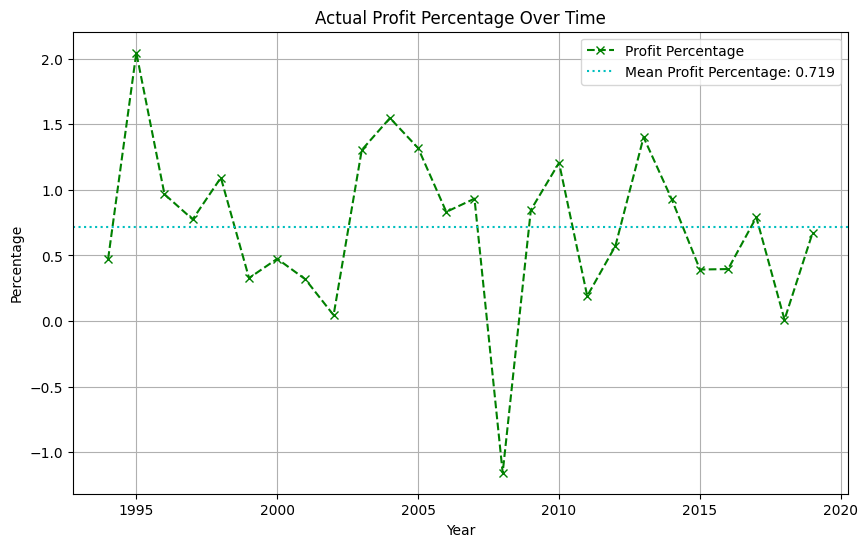

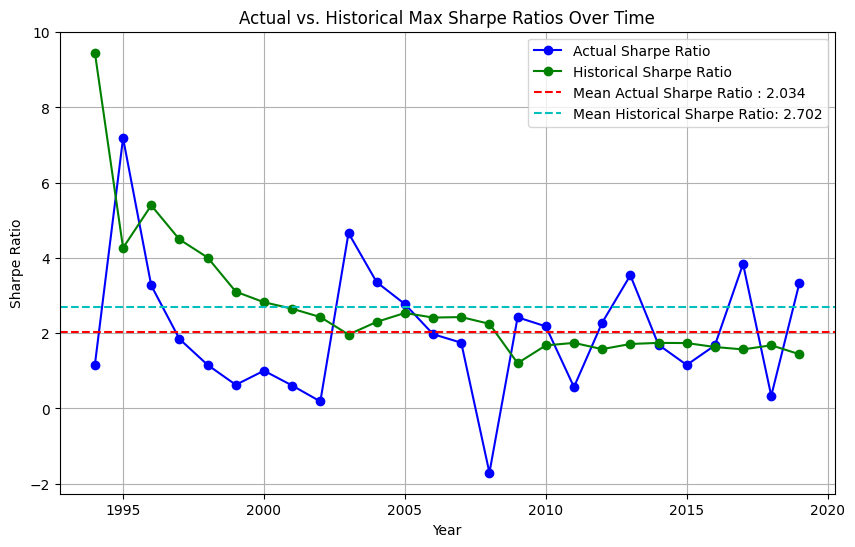

In [21]:

# 绘制实际年化回报率随时间变化的图
years = list(results_per_year.keys())
profit_percentages = [results_per_year[year]['profit_percentage'] for year in years]

mean_profit_percentages= np.mean(profit_percentages)

plt.figure(figsize=(10, 6))
# plt.plot(years, actual_returns, marker='o', linestyle='-', color='b', label='Actual Annual Return Rate')
plt.plot(years, profit_percentages, marker='x', linestyle='--', color='g', label='Profit Percentage')
# plt.axhline(y=np.mean(actual_returns), color='r', linestyle='--', label=f'Mean Actual Return: {mean_actual_return:.3f}')
plt.axhline(y=np.mean(profit_percentages), color='c', linestyle=':', label=f'Mean Profit Percentage: {mean_profit_percentages:.3f}')
plt.title('Actual Profit Percentage Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)
plt.show()

# 绘制实际夏普比率与历史夏普比率的比较图
actual_sharpe_ratios = [results_per_year[year]['actual_sharpe_ratio'] for year in years]
predicted_sharpe_ratios = [results_per_year[year]['predicted_sharpe_ratio'] for year in years]

mean_actual_sharpe_ratios = np.mean(actual_sharpe_ratios)
mean_predicted_sharpe_ratios = np.mean(predicted_sharpe_ratios)

plt.figure(figsize=(10, 6))
plt.plot(years, actual_sharpe_ratios, marker='o', linestyle='-', color='b', label='Actual Sharpe Ratio')
plt.plot(years, predicted_sharpe_ratios, marker='o', linestyle='-', color='g', label='Historical Sharpe Ratio')
plt.axhline(y=np.mean(actual_sharpe_ratios), color='r', linestyle='--', label=f'Mean Actual Sharpe Ratio : {mean_actual_sharpe_ratios:.3f}')
plt.axhline(y=np.mean(predicted_sharpe_ratios), color='c', linestyle='--', label=f'Mean Historical Sharpe Ratio: {mean_predicted_sharpe_ratios:.3f}')
plt.title('Actual vs. Historical Max Sharpe Ratios Over Time')
plt.xlabel('Year')
plt.ylabel('Sharpe Ratio')
plt.legend()
plt.grid(True)
plt.show()
